# Tips

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

+ 控制图形大小

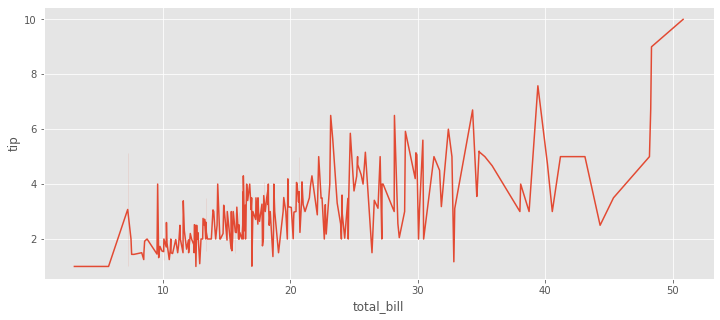

In [3]:
tips = sns.load_dataset("tips")
# 使用 maplotlib 控制图形大小
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=tips, x='total_bill', y='tip', ax=ax)

注意事项：  
1. 这里不能使用 `plt.subplot()`，因为它只返回一个`Axes`对象，不返回`Figure`对象，不能设置`figsize`
2. **不能使用 `sns.relplot`，它是 figure-level 的绘图，不能使用ax参数**

------------

+ 设置标题title  
注意：**seaborn中对于中文标题不支持**

对于Figure-level函数返回的`FaceGrid`对象，可以调用`.fig`获得`Figure`对象，然后设置title

Text(0.5, 0.98, 'Fligths')

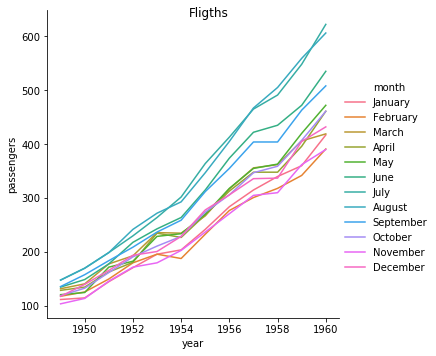

In [21]:
flights = sns.load_dataset("flights")
g = sns.relplot(data=flights,x="year", y="passengers", hue="month", kind='line')
# 设置标题
g.fig.suptitle("Fligths")

对于 Axes-level函数返回的`Axes`对象，可以调用`.set_title()`设置title

Text(0.5, 1.0, 'Flights')

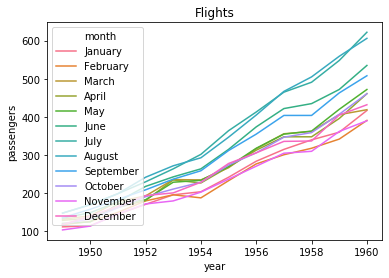

In [23]:
ax = sns.lineplot(data=flights,x="year", y="passengers", hue="month")
ax.set_title('Flights')

----------

+ long-form和wide-form的处理

一般来说，seaborn能够处理的数据格式是long-form的，对于常见的wide-form格式数据，seaborn有一些简单的处理方式

In [2]:
df_long = sns.load_dataset("flights")
df_wide = df_long.pivot(index="year", columns="month", values="passengers")

In [5]:
df_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
df_wide.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


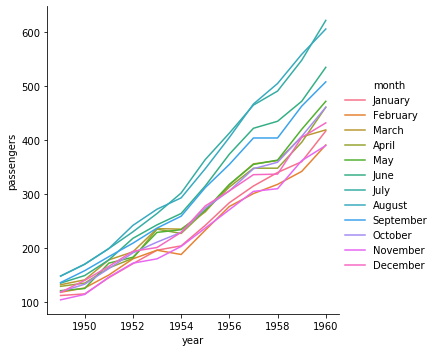

In [12]:
sns.relplot(data=df_long, x="year", y="passengers", hue="month", kind='line')

In [14]:
# 这里有点问题
sns.relplot(data=df_wide,  kind='line')

TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

---------------

# Seaborn基础

## Figure-level和Axes-level绘图函数

seaborn 的绘图函数分为两个层次，**figure-level** 和 **axes-level**：
+ figure-level的函数有`relplot`,`catplot`等，它们返回的是`FacetGrid`对象——它是对matplotlib里`Figure`的封装。  
这类函数都有一个`kind`参数，用来和 axes-level 的绘图函数进行绑定；
+ axes-level，这些函数返回的是matplotlib的 `Axes` 对象。

常用的figure-level和axes-level绘图函数如下.  
注意，这是 0.11.0(2020 September) 版的，主要的变化是：
1. 原来可视化分布的 `distplot`函数 --> `displot`（少了t）
2. 新增了`histplot`,`ecdfplot`

![seaborn-function-levels](https://seaborn.pydata.org/_images/function_overview_8_0.png)

## FaceGrid

在seaborn中，Axes-level的绘图函数返回的都是`matplotlib.axes.Axes`对象，所以直接使用matplotlib里的操作方式对这些图形对象进行设置就行了。  
而Figure-level的绘图函数返回的是一个 [**`seabornFaceGrid`**](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) 对象，熟练的使用seaborn需要对这个对象做一些说明。


`class seaborn.FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)`.  
`FaceGrid`类工作原理如下：
1. 首先使用数据集dataset（long-format）和要使用的变量来初始化一个对象。  
传入的变量被赋值给`row`, `col`, `hue` 这三个参数。  
`row`和`col`的取值会决定绘图的Figure的子图布局，比如row的取值为2，col取值为3，那就会绘制一个$2\times3$的布局子图。而`hue`会在每个子图里对数据进行分组。  
如果没有传入这些变量，默认不分割子图——这就是"FaceGrid"代表的意思。
2. 每个子图对应于数据的子集，在这些子集上，调用`FaceGrid.map()`或者`FaceGrid.map_dataframe()`方法，用同样的绘图函数进行绘图.
3. 对图形进行细微调整.


`FaceGrid`类的一些方法和属性如下所示，它们对微调图形很有帮助
+ `add_legend()`
+ `set_titles()`，给所有的子图设置title
+ `set_axis_labels()`
+ `set_xlabels()`
+ `set_xticklabels()`
+ `savefig()`

以下是有用的属性
+ `axes`，获取子图的axes对象列表
+ **`fig`，返回整个图形的Figure，拿到这个之后，就可以使用matplotlib里的许多工具对图形做调整了**。

Text(0.5, 0.98, 'The Big Title')

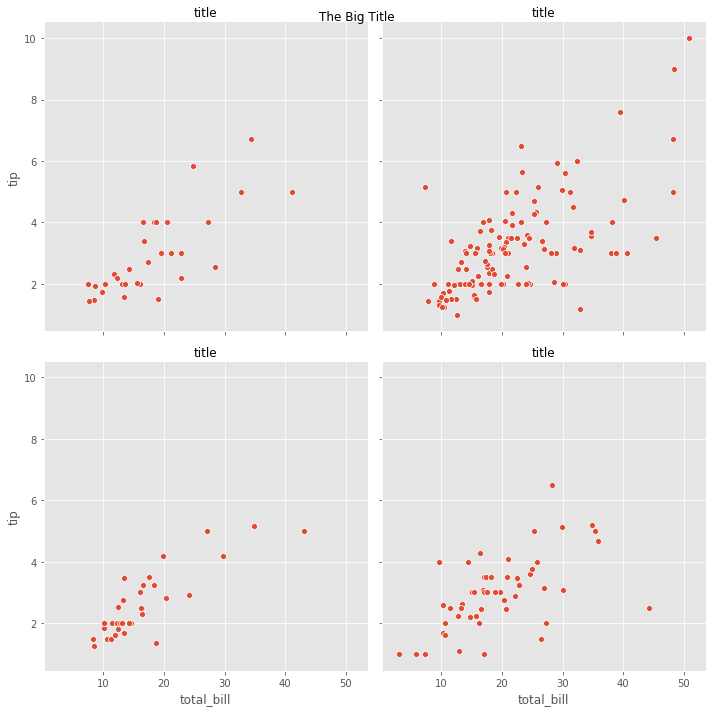

In [24]:
# 这里设置图形大小采用的参数是 height, aspect, 实际的width = height*aspect
# 特别需要注意的是，这里的参数设置的是单个子图的大小，不是整个figure的大小
g = sns.FacetGrid(tips, col="time",  row="sex",  height=5, aspect=1 )

# 在每个子图的数据集上调用同样的绘图函数
g.map(sns.scatterplot, "total_bill", "tip")

# 调整属性
g.set_titles(template='title')

# 最重要的，获取图形的Figure，直接调整属性
fig = g.fig
fig.suptitle('The Big Title')

seaborn的绘图函数里，公用的一些参数含义如下：
+ `data`: DataFrame
Tidy (**long-form**) dataframe where each column is a variable and each row is an observation.  
注意，DF的格式是long-format.

+ `hue`: name in data, optional  
Grouping variable that will produce elements with **different colors**. Can be either categorical or numeric, although color mapping will behave differently in latter case.

+ `size`: name in data, optional  
Grouping variable that will produce elements with **different sizes**. Can be either categorical or numeric, although size mapping will behave differently in latter case.

+ `style`: name in data, optional  
Grouping variable that will produce elements with **different styles**.  Can have a numeric dtype but will always be treated as categorical.

+ `row, col`: names of variables in data, optional  
Categorical variables that will determine the faceting of the grid.

+ `height`, `aspect`: 设置图形大小.  
不同于matplotlib，这里没有 width，而是通过 $width=height*aspect$ 间接得到width的值。  
特别要注意的是，这个参数**设置的是每个子图所在Axes的大小**，所以在Figure-level的函数里，需要注意。

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# styles的选择["white", "dark", "whitegrid", "darkgrid", "ticks"]
# sns.set(style="darkgrid")
from IPython.display import display

+ 数据集

In [10]:
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")
print('tips')
display(tips.head())
print('fmri')
display(fmri.head())

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


fmri


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


----

# 可视化统计关系-`replot`

Visualizing statistical relationships的顶层绘图函数

`relplot([x, y, hue, size, style, data, row, …])`  
**Figure-level** interface for drawing relational plots onto a FacetGrid.
+ `scatterplot([x, y, hue, style, size, data, …])`  
Draw a scatter plot with possibility of several semantic groupings，(`kind="scatter"`，默认)
+ `lineplot([x, y, hue, size, style, data, …])`  
Draw a line plot with possibility of several semantic groupings，(`kind=line`)

## 散点图

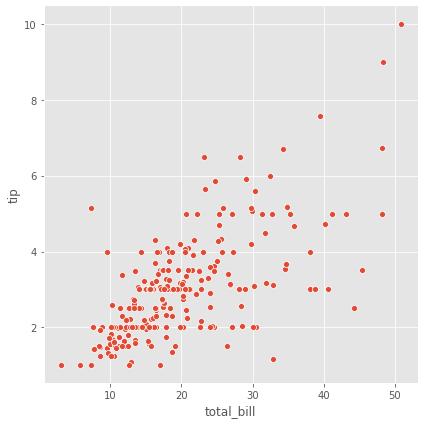

In [26]:
sns.relplot(data=tips, x='total_bill', y='tip', height=6, aspect=1)

+ `hue`参数映射点的颜色

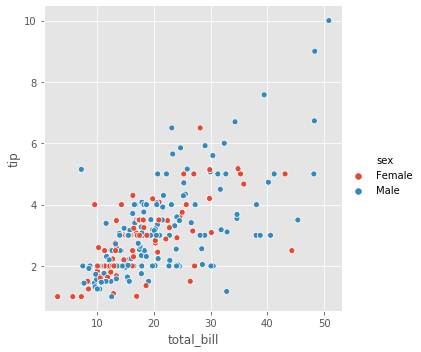

In [11]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex')

+ `style`参数映射点的形状

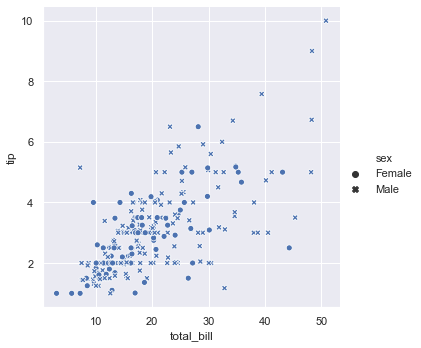

In [12]:
sns.relplot(data=tips, x='total_bill', y='tip', style='sex')

`size`参数映射点的大小

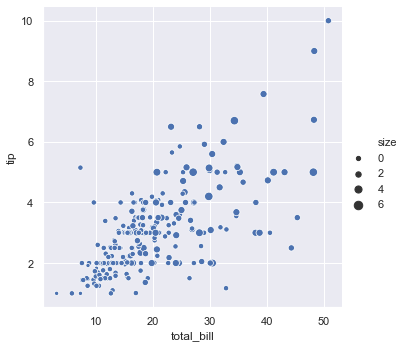

In [14]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

+ `row`,`col`参数映射用于分面的变量

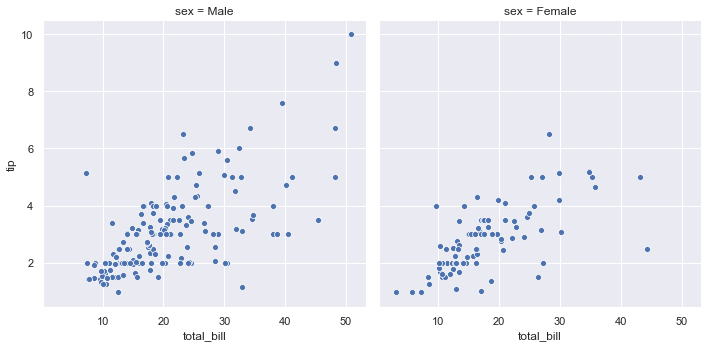

In [15]:
sns.relplot(data=tips, x='total_bill', y='tip', col='sex')

## 线图

**对于line来说，如果data中同一个x对应多个y值，会自动绘制均值的折线图，并绘制95%的置信区间。**

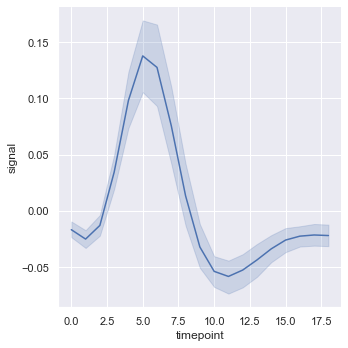

In [18]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

分组绘制线

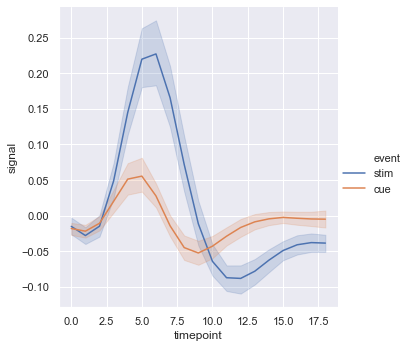

In [19]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue = 'event',kind='line')

-------

# 可视化分类变量-`catplot`

用于绘制分类变量之间的关系，只要有一个变量是分类变量即可。

顶层绘图函数——Categorical plots    
`catplot([x, y, hue, data, row, col, …])` —— **Figure-level** interface for drawing categorical plots onto a FacetGrid.  

按照绘制图形的不同，又分为三类：
1. 散点图
2. 分布图
3. 估计图

## 散点图

这里的“散点图”里一个变量是分类特征，另一个是连续特征。绘制的是 在分类特征的每个类别里 连续特征是如何分布的。  
作用是 **分析分类特征的不同类别取值对于连续特征的分布影响**。

主要有如下两个函数
+ `stripplot([x, y, hue, data, order, …])`  
Draw a scatterplot where one variable is categorical，(`kind=strip`，默认)  
`jitter`参数控制点左右的分散程度。

+ `swarmplot([x, y, hue, data, order, …])`  
Draw a categorical scatterplot with non-overlapping points，(`kind=swarm`) .     
采用特殊的算法分散点，**不适用于大数据集**。

Text(0.5, 1.0, 'Swarmplot with x,y exchanged')

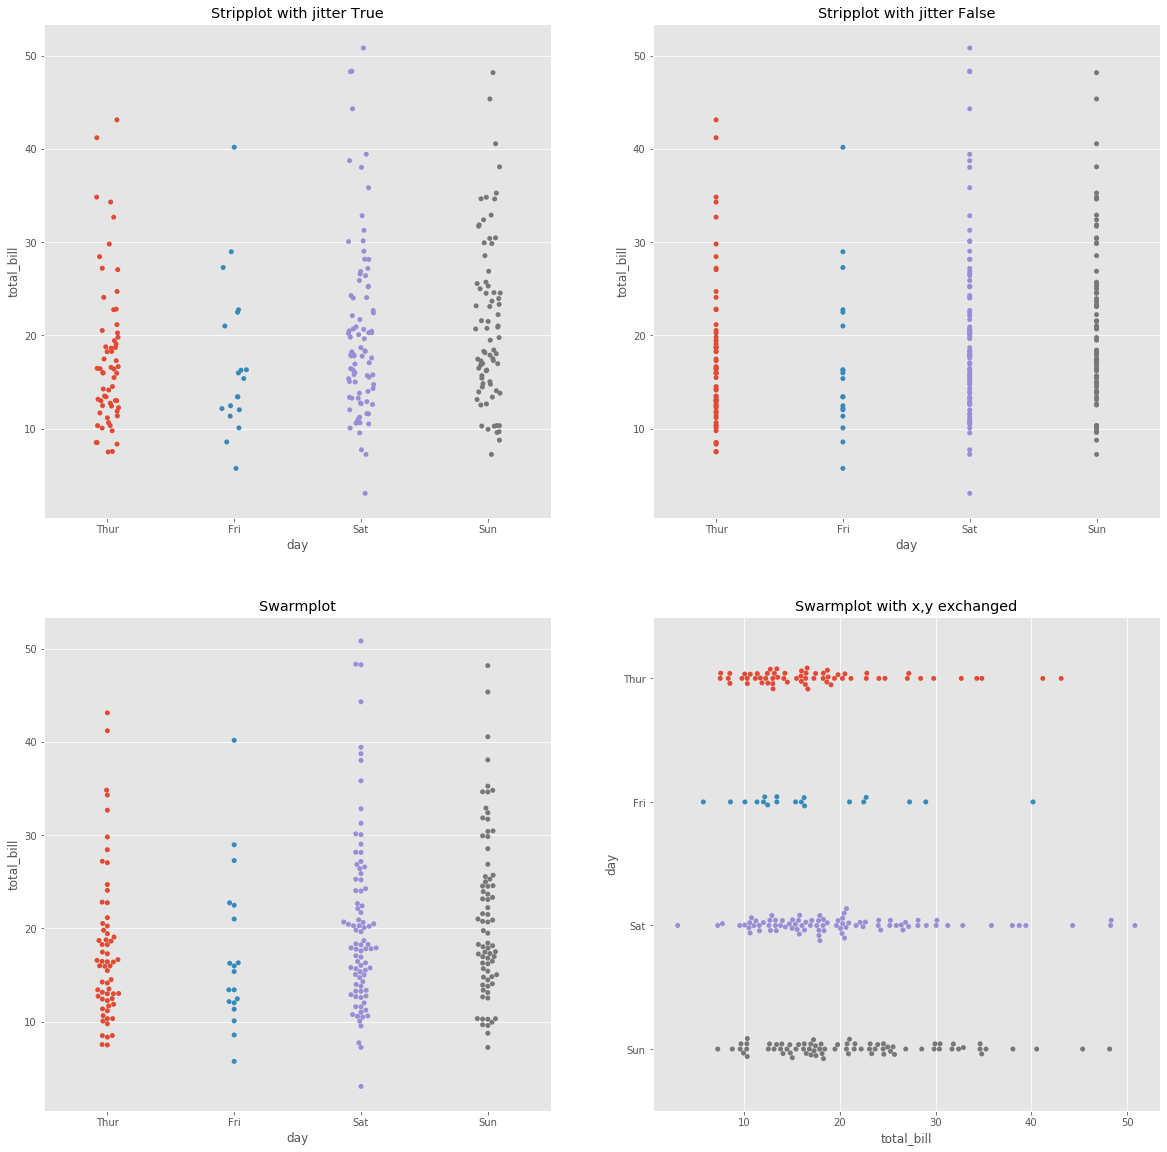

In [43]:
fig, axes = plt.subplots(2,2, figsize=(20,20))
# 1，2号图是 stripplot, 区别只是 jitter 参数是否打开
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False, ax=axes[0,1])
# 3号图是 swarmplot
sns.swarmplot(data=tips, x="day", y="total_bill", ax=axes[1,0])
# 4号图交换横纵坐标
sns.swarmplot(data=tips, y="day", x="total_bill", ax=axes[1,1])

axes[0,0].set_title('Stripplot with jitter True')
axes[0,1].set_title('Stripplot with jitter False')
axes[1,0].set_title('Swarmplot')
axes[1,1].set_title('Swarmplot with x,y exchanged')

## 分布图（箱线图）   

主要是绘制 连续特征 在分类特征内每个取值上的分布。

+ `boxplot([x, y, hue, data, order, hue_order, …])` 箱线图，(`kind=box`)

+ `boxenplot([x, y, hue, data, order, …])` 多阶梯箱线图，适合大数据集，(`kind=boxen`)

+ `violinplot([x, y, hue, data, order, …])` 小提琴图，箱线图与核密度估计图的结合，(`kind=violin`)

Text(0.5, 1.0, 'Violinplot')

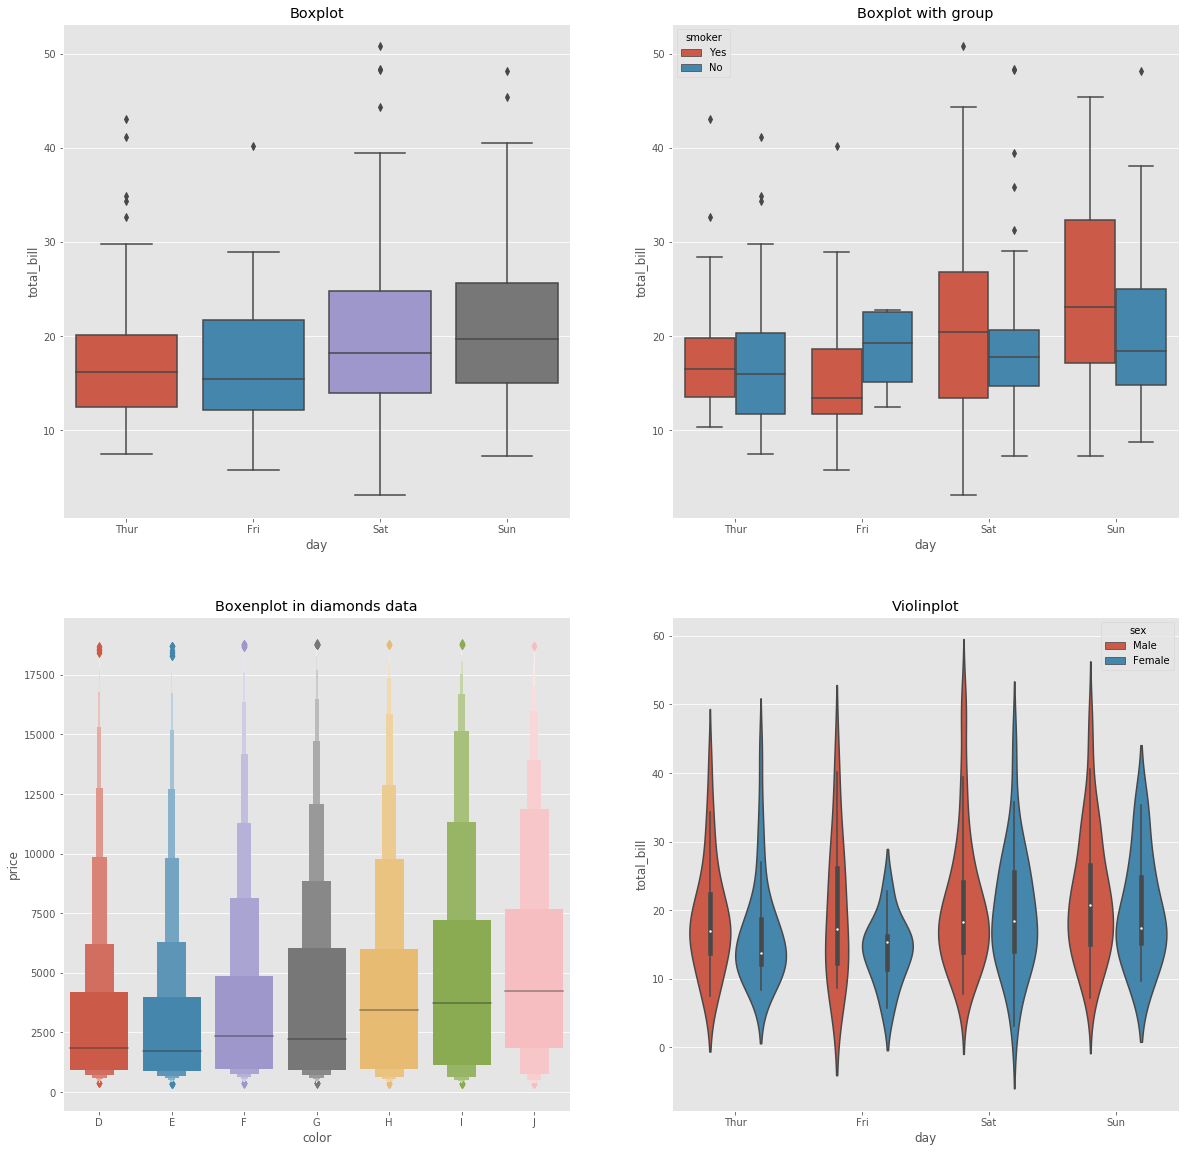

In [41]:
diamonds = sns.load_dataset("diamonds")
# diamonds.head()

fig, axes = plt.subplots(2,2, figsize=(20,20))

# 普通箱线图
sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0,0])
# # 分组箱线图
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[0,1])
# # 多阶梯箱线图
sns.boxenplot(data=diamonds.sort_values("color"), x="color", y="price", ax=axes[1,0])
# # 小提琴图
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", ax=axes[1,1])

axes[0,0].set_title('Boxplot')
axes[0,1].set_title('Boxplot with group')
axes[1,0].set_title('Boxenplot in diamonds data')
axes[1,1].set_title('Violinplot')

## 估计图（条形图）  

Categorical **estimate** plots. 主要是分析 分类特征里每个取值内 连续特征的概率分布估计。

+ `barplot([x, y, hue, data, order, hue_order, …])` —— 频率条形图  
Show point estimates and confidence intervals as rectangular bars，(`kind=bar`)

+ `countplot(*[, x, y, hue, data, order, …])` —— 频数条形图   
Show the counts of observations in each categorical bin using bars. (`kind=count`)

+ `pointplot([x, y, hue, data, order, …])` —— 这个图不知道是啥意思。。。   
Show point estimates and confidence intervals using scatter plot glyphs，(`kind=point`)

Text(0.5, 1.0, 'Pointplot ???')

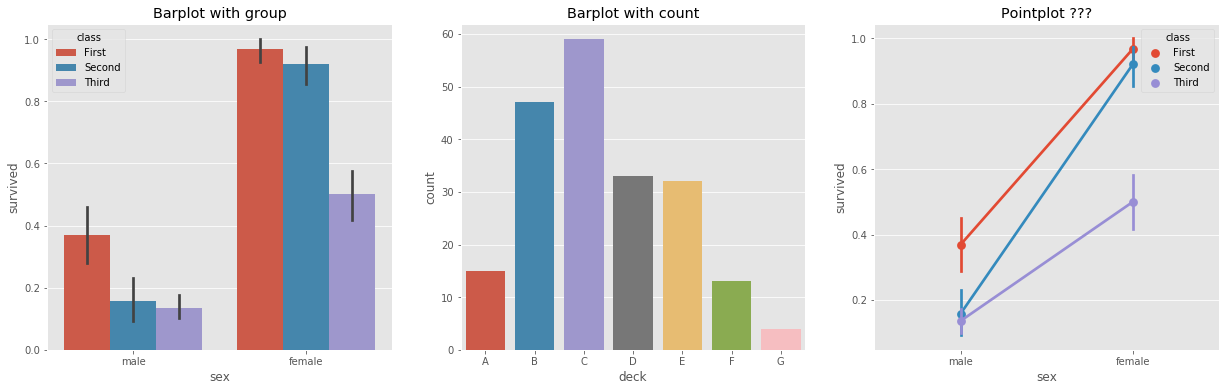

In [46]:
titanic = sns.load_dataset("titanic")
# titanic.head()
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.barplot(data=titanic, x="sex", y="survived", hue="class", ax=axes[0])
sns.countplot(data=titanic, x="deck", ax=axes[1])
sns.pointplot(data=titanic, x="sex", y="survived", hue="class", ax=axes[2])
axes[0].set_title('Barplot with group')
axes[1].set_title('Barplot with count')
axes[2].set_title('Pointplot ???')

----------

# 可视化数据集分布—`displot`

Visualizing the distribution of a dataset，用于可视化数据集的分布，这部分的绘图函数最适合做EDA。

## 单变量分布（直方图）

`histplot([data, x, y, hue, weights, stat, …])` Plot univariate or bivariate histograms to show distributions of datasets.
+ `stat`，指定每箱中的统计量，有如下四种：
  + 'count'，频数直方图
  + 'frequency'，频率直方图
  + 'density'，normalizes counts so that the area of the histogram is 1
  + 'probability'，normalizes counts so that the sum of the bar heights is 1
+ `bins`，str, number, vector, or a pair of such values
+ `kde`，bool，是否绘制核密度图

In [47]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [51]:
sns.__version__

'0.10.1'

In [50]:
sns.histplot(data=penguins, x="flipper_length_mm")

AttributeError: module 'seaborn' has no attribute 'histplot'

可以使用`kde=False`来绘制单纯的直方图。  
下图中，打开了`rug`参数，坐标轴附件的竖线就是所谓的Rug图——它也可以使用`rugplot()`函数单独绘制

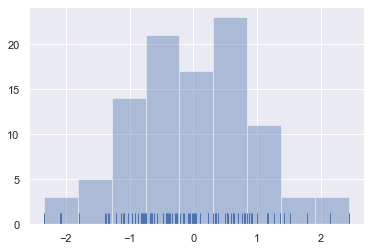

In [41]:
sns.distplot(x, kde=False, rug=True)

绘制直方图时指定bins

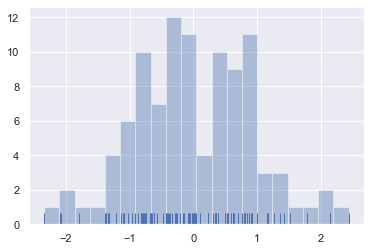

In [42]:
sns.distplot(x, kde=False, rug=True, bins=20)

绘制核密度图，只要关闭`hist`参数就行

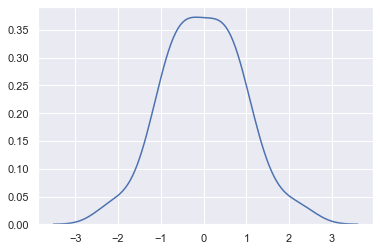

In [44]:
sns.distplot(x, kde=True, hist=False)

+ 使用fit参数来绘制根据数据拟合的分布

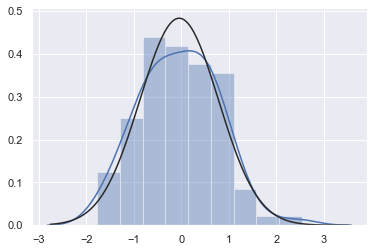

In [6]:
from scipy.stats import norm

sns.distplot(x, kde=True, fit=norm)

上面也可以直接使用`kdeplot`绘制。  
直接使用`kdeplot`的话，可以提供更加精细的控制。

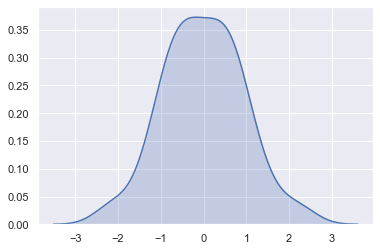

In [47]:
sns.kdeplot(x, shade=True)

## 二元变量的分布

`jointplot(x, y[, data, kind, stat_func, …])` Draw a plot of two variables with **bivariate** and **univariate** graphs.

常用参数有：
+ `x, y`:strings or vectors
Data or names of variables in data.
+ `data`:DataFrame, optional
DataFrame when x and y are variable names.
+ `kind`:{ “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
Kind of plot to draw.

+ `stat_fun`:ccallable or None, optional
Deprecated

+ `color`:matplotlib color, optional
Color used for the plot elements.

In [50]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

`jointplot`默认下会绘制`kind=scatter`类型的图——此时调用了`scatterplot()`函数。

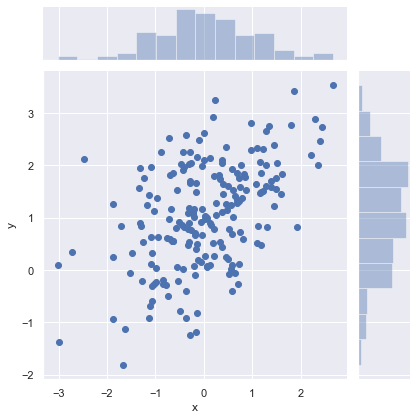

In [53]:
sns.jointplot(x="x", y="y", data=df)

绘制两变量的联合核密度图

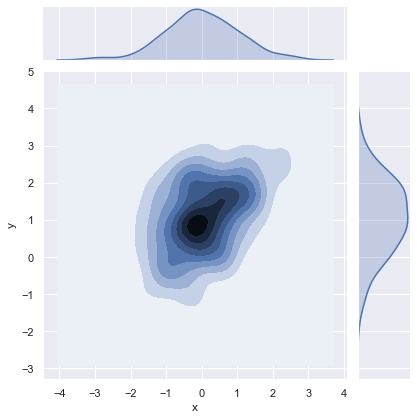

In [54]:
sns.jointplot(x="x", y="y", data=df, kind='kde')

也可以调用`kdeplot`函数来绘制

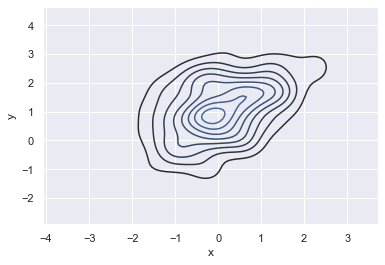

In [55]:
sns.kdeplot(df.x, df.y)

## 探索数据集中成对变量间的关系

`pairplot(data[, hue, hue_order, palette, …])` Plot **pairwise relationships** in a dataset.

In [56]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


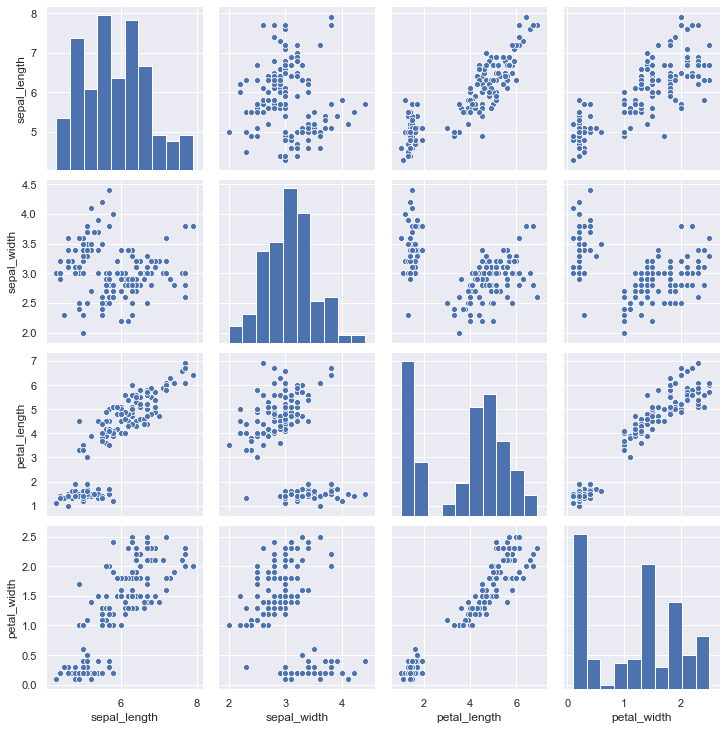

In [57]:
sns.pairplot(iris)

指定分割变量`hue`，直接绘制iris中三种类型的花瓣的变量间的关系

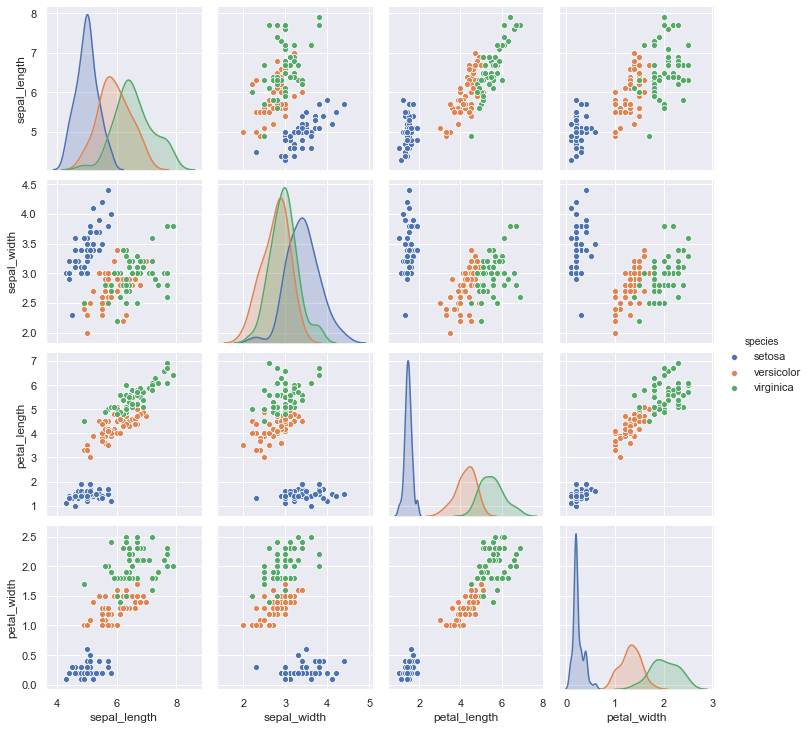

In [58]:
sns.pairplot(iris, hue="species")

## 其他

下面的这两个函数可以单独使用，但是它们已经被包含在上面那几个函数的参数中了。

+ `kdeplot(data[, data2, shade, vertical, …])` Fit and plot a **univariate** or **bivariate** kernel density estimate.

+ `rugplot(a[, height, axis, ax])` Plot datapoints in an array as sticks on an axis.

---

# 可视化线性模型

+ `regplot(x, y[, data, x_estimator, x_bins, …])`  
Plot data and a linear regression model fit.

+ `lmplot(x, y, data[, hue, col, row, palette, …])`  
Plot data and regression model fits across a FacetGrid.

+ `residplot(x, y[, data, lowess, x_partial, …])`  
Plot the residuals of a linear regression.

**`lmplot()`比`regplot()`的功能更多，它能根据分组变量绘制多条回归线** 。  
实际上，`lmplot()`是对`regplot()`和`FacetGrid`进行了封装，这也意味着`regplot()`是一个**axes-level**的绘图API。

# 其他有用的绘图函数

## 热力图

`headmap(data, vmin=None, vmax=None, cmap=None, center=None,...)`

In [65]:
uniform_data = pd.DataFrame(np.random.rand(4, 5))

In [66]:
uniform_data

,0,1,2,3,4
0,0.520713,0.534483,0.585389,0.036005,0.183887
1,0.047489,0.261476,0.167109,0.093047,0.363081
2,0.111175,0.680854,0.274436,0.018009,0.571864
3,0.568148,0.421419,0.841750,0.971563,0.829060


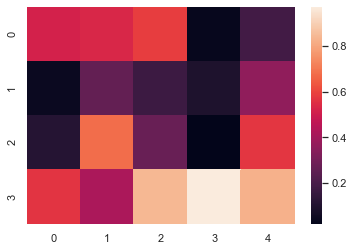

In [67]:
sns.heatmap(uniform_data)

-------------